# Visualisierung von Vektorfeldern mit Hilfe von Stromlinien

__Manfred Brill, Hochschule Kaiserslautern__

Insbesondere für dreidimensionale Vektorfelder wird die grafische Darstellung von Vektorfeldern mit Hilfe von *quiver* schnell unübersichtlich. In der Praxis
verwendet man Feld- oder Stromlinien. Diese Linien, für ein differenzierbares Vektorfeld differenzierbare Parameterkurven, können wir als Lösung von Anfangswertproblemen berechnen. In diesem Notebook verwenden wir die ebene Staupunktströmung als Beispiel.

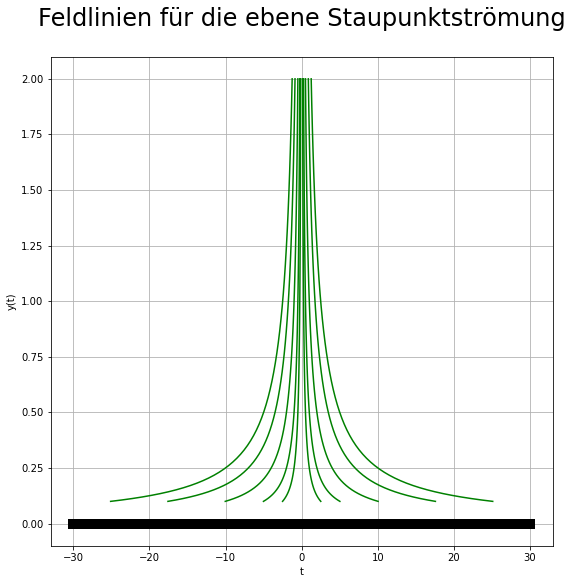

In [9]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def impound_plane(t, y, a=1.0):
    """
    Ebene rotationssymmetrische Staupunktströmung
    """
    return np.array([a*y[0], -a*y[1]])


# Daten für die "Wand"
wx = np.array([-30.0, 30.0])
wy = np.zeros(shape=(2,))

a = 0.0
b = 3.0
n = 51
eval = np.linspace(a, b, n)

xvals = np.linspace(-1.25, 0.25, 5)

plt.figure(figsize=(9.0, 9.0))
plt.grid(True)
for x in xvals:
    ivs = np.array([x, 2])
    sol = integrate.solve_ivp(fun=impound_plane, t_span=[a, b], y0=ivs,
                              t_eval=eval, vectorized=True)
    if sol.success:
        plt.plot(sol.y[0, :], sol.y[1, :], 'g-')

xvals = -xvals
for x in xvals:
    ivs = np.array([x, 2])
    sol = integrate.solve_ivp(fun=impound_plane, t_span=[a, b], y0=ivs,
                              t_eval=eval, vectorized=True)
    if sol.success:
        plt.plot(sol.y[0, :], sol.y[1, :], 'g-')

# Die "Wand" ausgeben
plt.plot(wx, wy, 'k-', lw=10)
plt.title('Feldlinien für die ebene Staupunktströmung',
          y=1.05, 
          fontsize=24)
plt.xlabel('t')
plt.ylabel('y(t)')

plt.show()

## streamplot
In Matplotlib finden wir eine Funktion *streamplot*, mit der wir ebenfalls Stromlinien berechnen und ausgeben können. Diese Funktion illustrieren wir mit Hilfe des Vektorfelds für zwei elektrische Ladungen, das wir bereits als Motivation für die Betrachtung von Vektorfeldern in der Vorlesung eingeführt hatten. Dazu berechnen wir das Vektorfeld auf einem Gitter und übergeben diese Daten an *streamplot*.

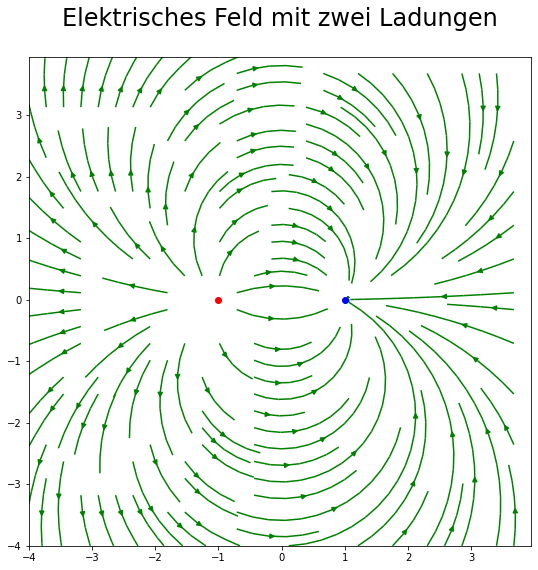

In [7]:
def two_charges(x, y):
    """
    Vektorfeld als Überlagerung von zwei Ladungen in (+-1, 0)
    """
    u = (x + 1.0)/((x + 1.0)**2 + y**2) - (x - 1.0)/((x-1.0)**2 + y**2)
    v = y/((x + 1.0)**2 + y**2) - y/((x - 1)**2 + y**2)
    return u, v


xmin = -4.0
xmax = 4.0
ymin = -4.0
ymax = 4.0
x = np.arange(xmin, xmax, 0.05)
y = np.arange(ymin, ymax, 0.05)
x, y = np.meshgrid(x, y)
u, v = two_charges(x, y)

plt.figure(figsize=(9.0, 9.0))

plt.streamplot(x, y, u, v,
               color='g',
               density=1,
               integration_direction='forward'
               )

# Die beiden Punktladungen darstellen
plt.plot(-1.0, 0.0, 'or')
plt.plot(1.0, 0.0, '-ob')
plt.title('Elektrisches Feld mit zwei Ladungen',
          y=1.05, 
          fontsize=24)

plt.show()